### Non-parametric methods using pandas and scipy

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sb

import scipy
from scipy.stats import spearmanr

In [2]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [3]:
address = 'F:\Learn R\Dataset\mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


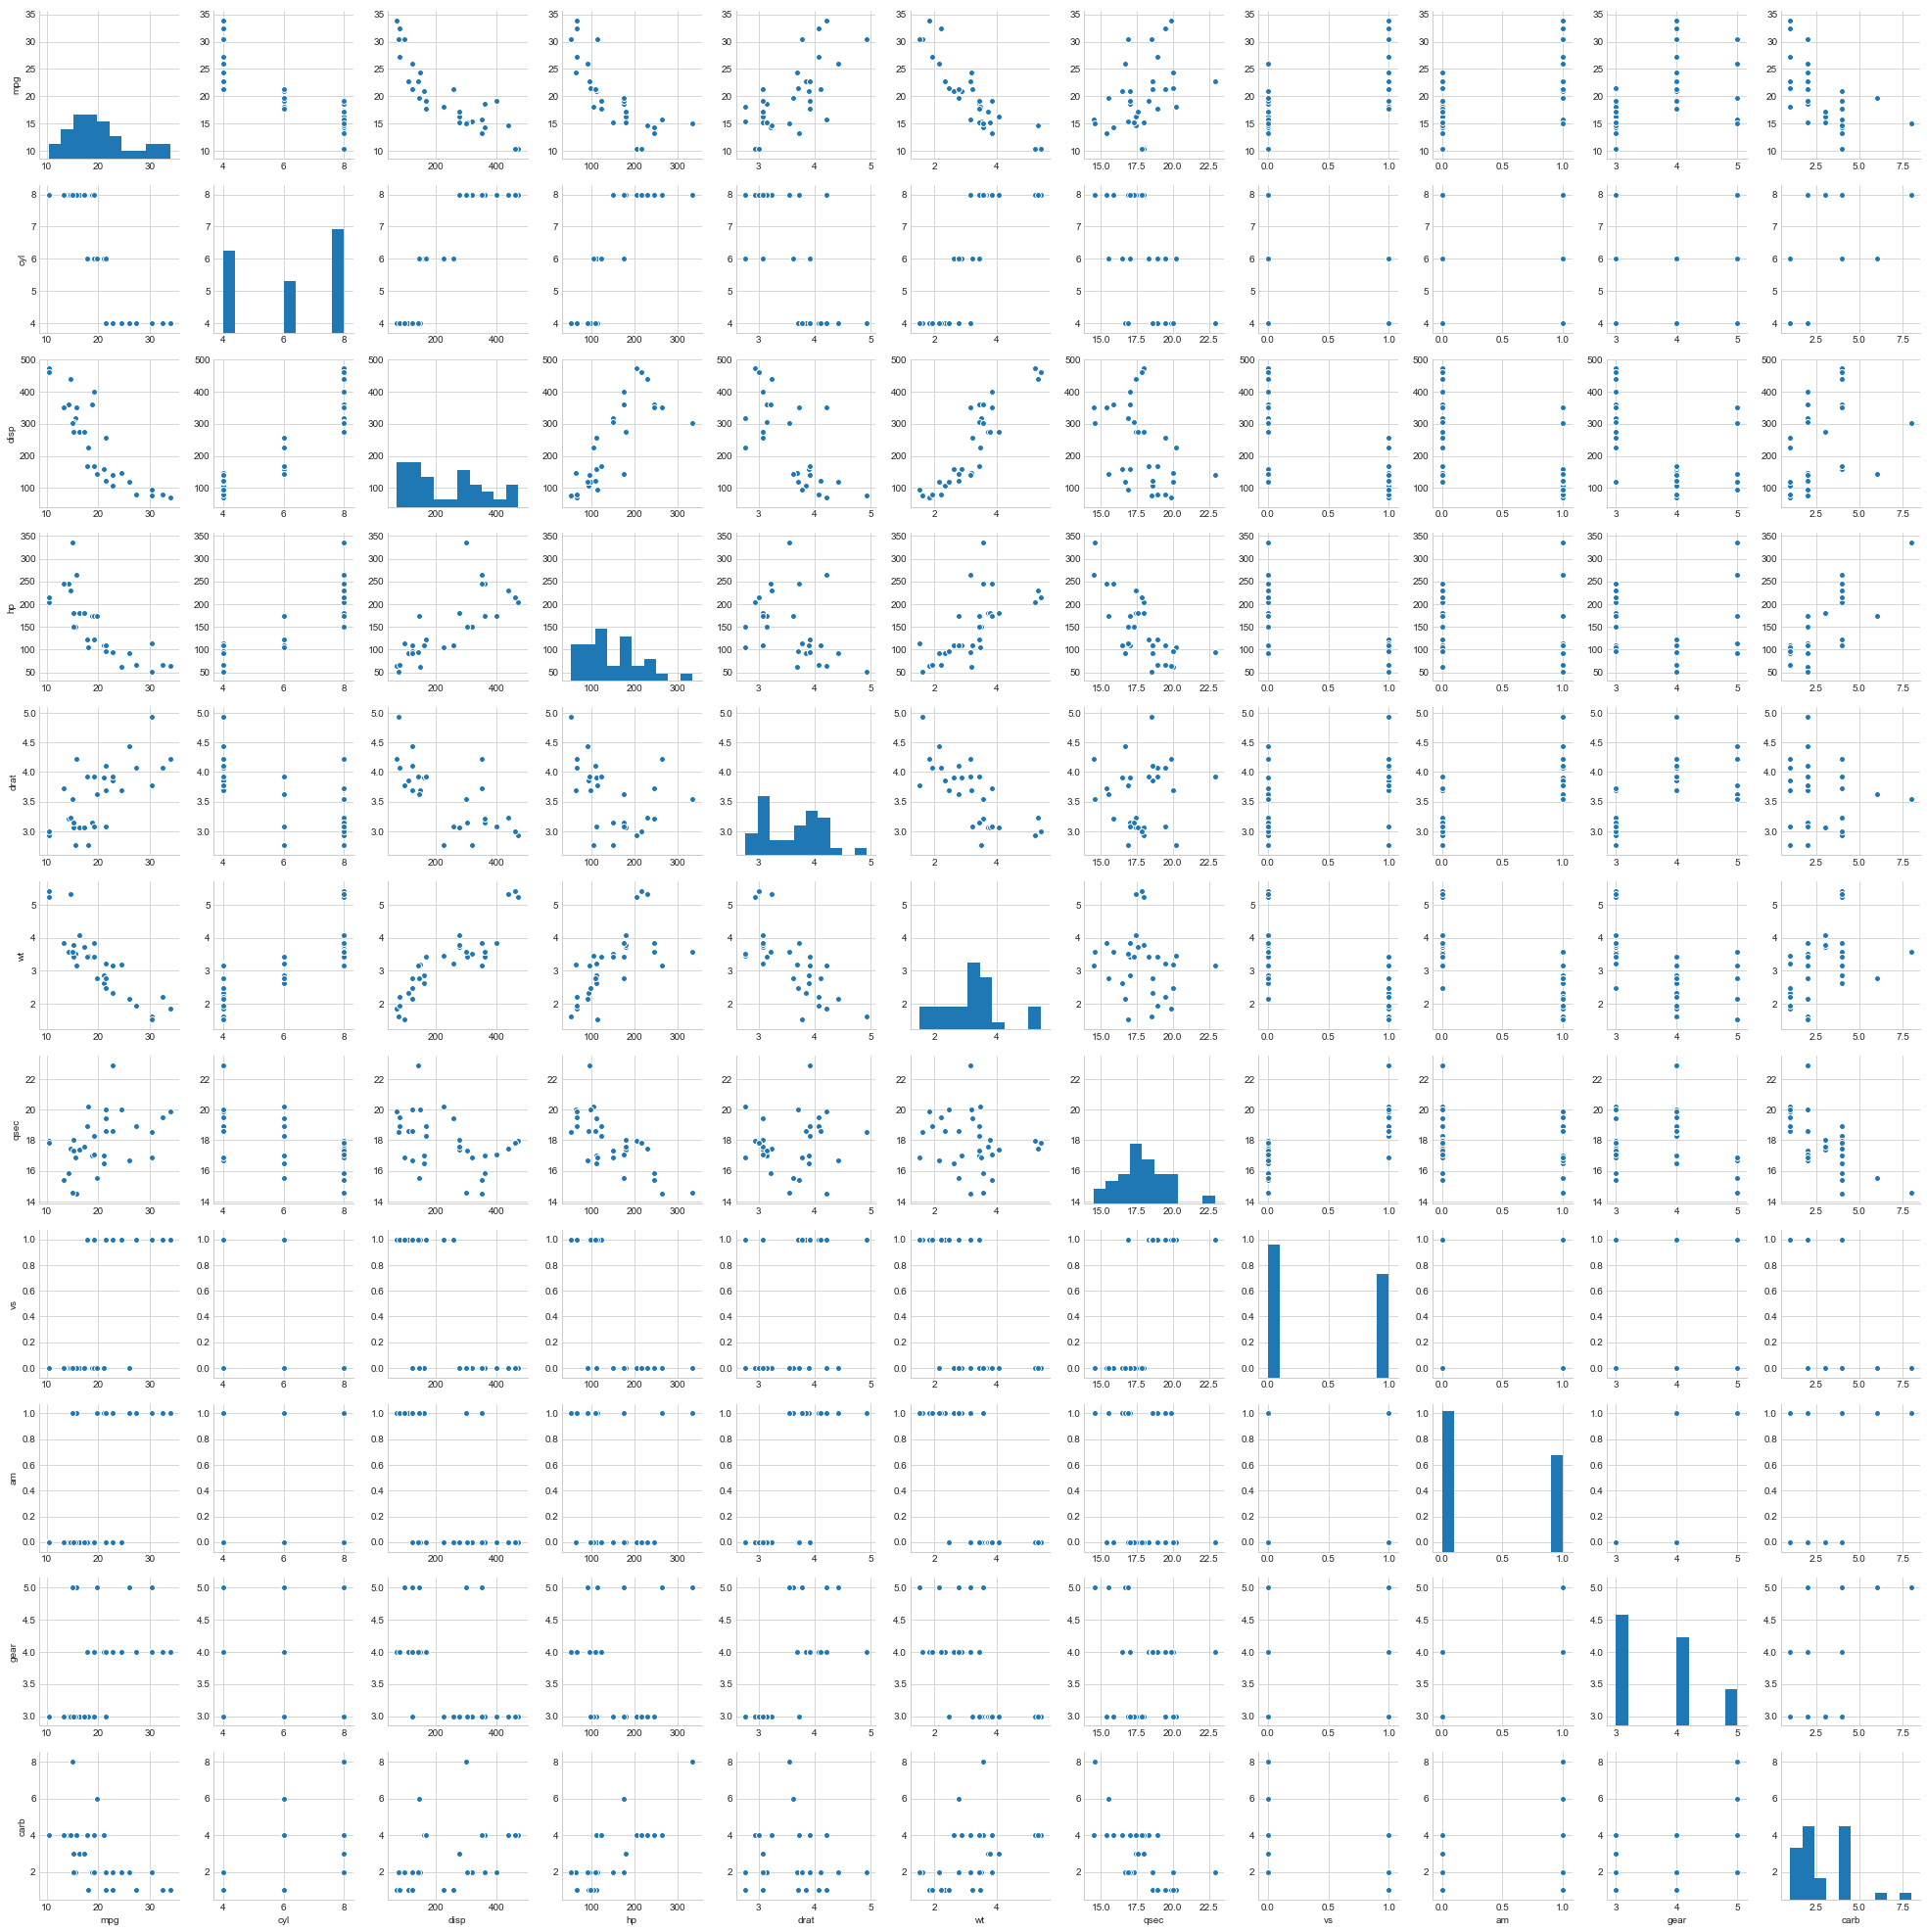

In [4]:
sb.pairplot(cars)

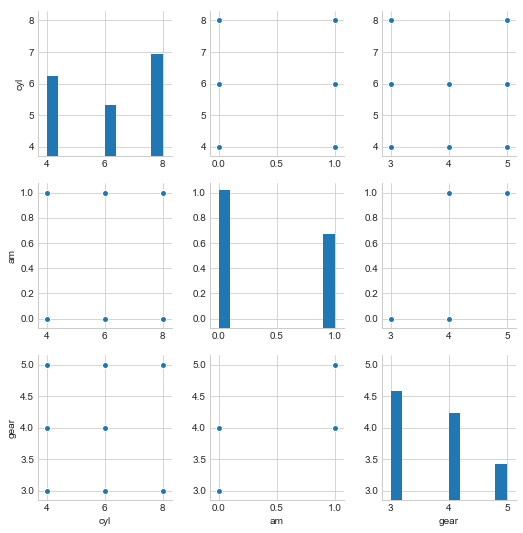

In [5]:
x = cars[['cyl','am','gear']]
sb.pairplot(x)

In [6]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmanr_coefficient, p_value=spearmanr(cyl,vs)
print( 'Separman Rank Correlation Coefficient %0.3f' %(spearmanr_coefficient))

Separman Rank Correlation Coefficient -0.814


In [7]:
spearmanr_coefficient, p_value=spearmanr(cyl,am)
print( 'Separman Rank Correlation Coefficient %0.3f' %(spearmanr_coefficient))

Separman Rank Correlation Coefficient -0.522


In [8]:
spearmanr_coefficient, p_value=spearmanr(cyl,gear)
print( 'Separman Rank Correlation Coefficient %0.3f' %(spearmanr_coefficient))

Separman Rank Correlation Coefficient -0.564


#### Chi-Square test for independence

In [9]:
table = pd.crosstab(cyl,am)

#p<0.05 reject null hypothesis -> variables are correlated
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistics %0.3f p_value %0.3f' % (chi2,p))

Chi-square statistics 8.741 p_value 0.013


In [10]:
table = pd.crosstab(cars['cyl'],cars['vs'])

#p<0.05 reject null hypothesis -> variables are correlated
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistics %0.3f p_value %0.3f' % (chi2,p))

Chi-square statistics 21.340 p_value 0.000


In [11]:
table = pd.crosstab(cars['cyl'],cars['gear'])

#p<0.05 reject null hypothesis -> variables are correlated
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistics %0.3f p_value %0.3f' % (chi2,p))

Chi-square statistics 18.036 p_value 0.001
